In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 61s 5us/step
x_train.shape: (60000, 28, 28)


In [3]:
mnist

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.mnist' from '/home/dipesh/anaconda3/envs/venv/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2959 - accuracy: 0.9143 - val_loss: 0.1423 - val_accuracy: 0.9587
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1440 - accuracy: 0.9572 - val_loss: 0.1063 - val_accuracy: 0.9673
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1077 - accuracy: 0.9671 - val_loss: 0.0811 - val_accuracy: 0.9761
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0742 - accuracy: 0.9766 - val_loss: 0.0754 - val_accuracy: 0.9768
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0634 - accuracy: 0.9798 - val_loss: 0.0677 - val_accuracy: 0.9791
Epoch 7/10
60000/60000 [==============================] 

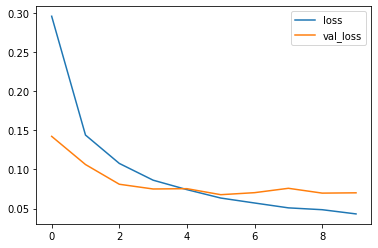

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

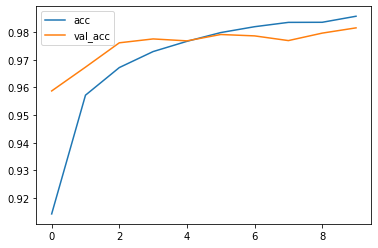

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0701 - accuracy: 0.9815
[0.07011051528542885, 0.9815]


Confusion matrix, without normalization
[[ 969    1    3    0    1    1    3    1    1    0]
 [   0 1127    2    0    0    0    3    0    3    0]
 [   0    1 1016    4    0    0    3    5    3    0]
 [   1    0    4  991    0    3    0    5    3    3]
 [   1    0    5    0  959    0    3    2    1   11]
 [   2    0    0    7    1  873    5    1    2    1]
 [   4    3    2    1    1    1  946    0    0    0]
 [   1    6   11    1    1    0    0 1001    2    5]
 [   3    0    3    4    1    2    2    4  950    5]
 [   0    3    0    3   10    2    1    6    1  983]]


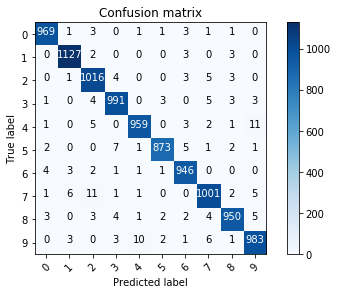

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 